# Final assignment for IBM Data Science Capstone Project

## Opening an Italian restaurant in Toronto

## 1: Create dataframe and scrap data from Wikipedia page

In [1]:
#importing the necessary libraries
!pip install bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.colors as colors
import re
import requests
import warnings


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=acb01f92085bb2ae8bd33d497fe47ef528184c9e23fbacdd6d306ef84b91ec02
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
#Beautiful soup
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data  = requests.get(url).text

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data , "html.parser")

table_contents=[]
table = soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
table_contents

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'},
 {'PostalCode': 'M4A',
  'Borough': 'North York',
  'Neighborhood': 'Victoria Village'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Regent Park, Harbourfront'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhood': 'Lawrence Manor, Lawrence Heights'},
 {'PostalCode': 'M7A',
  'Borough': "Queen's Park",
  'Neighborhood': 'Ontario Provincial Government'},
 {'PostalCode': 'M9A',
  'Borough': 'Etobicoke',
  'Neighborhood': 'Islington Avenue'},
 {'PostalCode': 'M1B',
  'Borough': 'Scarborough',
  'Neighborhood': 'Malvern, Rouge'},
 {'PostalCode': 'M3B',
  'Borough': 'North York',
  'Neighborhood': 'Don Mills North'},
 {'PostalCode': 'M4B',
  'Borough': 'East York',
  'Neighborhood': 'Parkview Hill, Woodbine Gardens'},
 {'PostalCode': 'M5B',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Garden District, Ryerson'},
 {'PostalCode': 'M6B', 'Borough': 'North York', 'N

In [3]:
import pandas as pd
# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [4]:
df.shape

(103, 3)

In [5]:
#Create columns
column_names = ['PostalCode','Borough','Neighborhood']
nw_data =  pd.DataFrame(columns=column_names)
nw_data

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []

In [6]:
for data in table_contents:
    Postal =  data['PostalCode']
    borough = data['Borough']
    neighborhood = data['Neighborhood']
    nw_data = nw_data.append({'PostalCode':Postal,
                    'Borough':borough,
                     'Neighborhood':neighborhood
                    },ignore_index=True)

In [7]:
nw_data.head()

PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

In [8]:
df.shape

(103, 3)

## 2: Find the Latitude and Longitude for each neighborhood in Toronto

In [9]:
# The code was removed by Watson Studio for sharing.

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

### Create the table with Latitude and Longitude per neighborhood


In [10]:
df1.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

df1.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [11]:
df_Toronto = nw_data.merge(df1, on="PostalCode", how="left")

In [12]:
df_Toronto.head(10)

PostalCode           Borough                      Neighborhood   Latitude  \
0        M3A        North York                         Parkwoods  43.753259   
1        M4A        North York                  Victoria Village  43.725882   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.654260   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.718518   
4        M7A      Queen's Park     Ontario Provincial Government  43.662301   
5        M9A         Etobicoke                  Islington Avenue  43.667856   
6        M1B       Scarborough                    Malvern, Rouge  43.806686   
7        M3B        North York                   Don Mills North  43.745906   
8        M4B         East York   Parkview Hill, Woodbine Gardens  43.706397   
9        M5B  Downtown Toronto          Garden District, Ryerson  43.657162   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494  
5 -79.532242  
6 -79.194353  
7 -79.352188  
8 -79.309937  
9 -79.378937

## 3: Create a map of Toronto including the neighborhoods
### Import libraries


In [13]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  py

#### Use geopy library to get the latitude and longitude values of Toronto


In [14]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [15]:

toronto_map =  folium.Map(location=[latitude,longitude],zoom_start=10)
for lat,lng, neighborhood in zip(df_Toronto['Latitude'],df_Toronto['Longitude'],df_Toronto['Neighborhood']):
    label = '{}, {}'.format(df_Toronto, neighborhood)
    label =  folium.Popup(label,parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popus = label,
    color = "blue",
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html = False).add_to(toronto_map)
    
toronto_map

## 4. Use the Foursquare API to explore the neighborhoods

In [16]:
CLIENT_ID = 'AREU2ENL21RQK2EG2NG5KIMMWZOTAX1WN4ZM1VLORTAYKDHK' # your Foursquare ID
CLIENT_SECRET = 'VOJ5UPEDQYHWZY5FCGTQXTOG5IMUVLWIHUIO0BVHKDG04OF0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AREU2ENL21RQK2EG2NG5KIMMWZOTAX1WN4ZM1VLORTAYKDHK
CLIENT_SECRET:VOJ5UPEDQYHWZY5FCGTQXTOG5IMUVLWIHUIO0BVHKDG04OF0


In [17]:
df_Toronto.loc[0, 'Neighborhood']

'Parkwoods'

In [18]:
neighborhood_latitude = df_Toronto.loc[0, 'Latitude'] 
# neighborhood latitude value
neighborhood_longitude = df_Toronto.loc[0, 'Longitude'] 
# neighborhood longitude value
neighborhood_name = df_Toronto.loc[0, 'Neighborhood'] 
# neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


### Get the top 100 venues within a radius of 5000 meters

In [19]:
LIMIT = 100
radius = 5000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AREU2ENL21RQK2EG2NG5KIMMWZOTAX1WN4ZM1VLORTAYKDHK&client_secret=VOJ5UPEDQYHWZY5FCGTQXTOG5IMUVLWIHUIO0BVHKDG04OF0&v=20180605&ll=43.7532586,-79.3296565&radius=5000&limit=100'

In [21]:
results = requests.get(url).json()

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


name            categories        lat        lng
0              Allwyn's Bakery  Caribbean Restaurant  43.759840 -79.324719
1  Donalda Golf & Country Club           Golf Course  43.752816 -79.342741
2           Graydon Hall Manor           Event Space  43.763923 -79.342961
3                 Island Foods  Caribbean Restaurant  43.745866 -79.346035
4         Galleria Supermarket           Supermarket  43.753520 -79.349518

## Explore Neighborhoods in Toronto

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [26]:
print(toronto_venues.shape)
toronto_venues.head()

(2142, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude  \
0         Brookbanks Park       43.751976       -79.332140   
1                     KFC       43.754387       -79.333021   
2           Variety Store       43.751974       -79.333114   
3  Victoria Village Arena       43.723481       -79.315635   
4             Tim Hortons       43.725517       -79.313103   

         Venue Category  
0                  Park  
1  Fast Food Restaurant  
2     Food & Drink Shop  
3          Hockey Arena  
4           Coffee Shop

In [27]:

toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               4   
Alderwood, Long Branch                                                  6   
Bathurst Manor, Wilson Heights, Downsview North                        21   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      28   
Berczy Park                                                            58   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           22   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Caledonia-Fairbanks                                                     4   
Cedarbrae                                                               8   
Central Bay Street                                                     68   
Christie                                                               15   
Church and Wellesley                                                   75   
Clairville, Humberwood, Woodbine Downs, West Hu...                      5   
Clarks Corners, Tam O'Shanter, Sullivan                                13   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             37   
Davisville North                                                        7   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills North                                                         5   
Don Mills South                                                        19   
Dorset Park, Wexford Heights, Scarborough Town ...                      6   
Downsview Central                                                       4   
Downsview East                                                          3   
Downsview Northwest                                                     4   
Downsview West                                                          5   
Dufferin, Dovercourt Village                                           14   
Enclave of L4W                                                         13   
Enclave of M4L                                                         17   
Enclave of M5E                                                         97   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      8   
Fairview, Henry Farm, Oriole                                           65   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Glencairn                                                               5   
Golden Mile, Clairlea, Oakridge                                         9   
Guildwood, Morningside, West Hill                                       9   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          25   
Hillcrest Village                                                       5   
Humber Summit                                                           1   
Humberlea, Emery                                                        2   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         23   
Kennedy Park, Ionview, East Birchmount Park                             5   
Kensington Market, Chinatown, Grange Park                              64   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                

In [28]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


## 5. Analyze Each Neighborhood

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
0                 0                 0                   0      0   
1                 0                 0                   0      0   
2                 0                 0                   0      0   
3                 0                 0                   0      0   
4                 0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0       0           0              0          0         0   
1       0           0              0          0         0   
2       0           0              0          0         0   
3       0           0              0          0         0   
4       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             

In [30]:
toronto_onehot.shape

(2142, 269)

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                                           Agincourt     0.000000   
1                              Alderwood, Long Branch     0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North     0.000000   
3                                     Bayview Village     0.000000   
4                   Bedford Park, Lawrence Manor East     0.000000   
5                                         Berczy Park     0.000000   
6                         Birch Cliff, Cliffside West     0.000000   
7        Brockton, Parkdale Village, Exhibition Place     0.000000   
8   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
9                                 Caledonia-Fairbanks     0.000000   
10                                          Cedarbrae     0.000000   
11                                 Central Bay Street     0.014706   
12                                           Christie     0.000000   
13                               Church and Wellesley     0.026667   
14  Clairville, Humberwood, Woodbine Downs, West H...     0.000000   
15            Clarks Corners, Tam O'Shanter, Sullivan     0.000000   
16    Cliffside, Cliffcrest, Scarborough Village West     0.000000   
17                     Commerce Court, Victoria Hotel     0.010000   
18                                         Davisville     0.000000   
19                                   Davisville North     0.000000   
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000   
21                                    Don Mills North     0.000000   
22                                    Don Mills South     0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...     0.000000   
24                                  Downsview Central     0.000000   
25                                     Downsview East     0.000000   
26                                Downsview Northwest     0.000000   
27                                     Downsview West     0.000000   
28                       Dufferin, Dovercourt Village     0.000000   
29                                     Enclave of L4W     0.000000   
30                                     Enclave of M4L     0.058824   
31                                     Enclave of M5E     0.010309   
32  Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.000000   
33                       Fairview, Henry Farm, Oriole     0.000000   
34             First Canadian Place, Underground city     0.000000   
35                           Forest Hill North & West     0.000000   
36                           Garden District, Ryerson     0.000000   
37                                          Glencairn     0.000000   
38                    Golden Mile, Clairlea, Oakridge     0.000000   
39                  Guildwood, Morningside, West Hill     0.000000   
40  Harbourfront East, Union Station, Toronto Islands     0.000000   
41                      High Park, The Junction South     0.000000   
42                                  Hillcrest Village     0.000000   
43                                      Humber Summit     0.000000   
44                                   Humberlea, Emery     0.000000   
45                                 Humewood-Cedarvale     0.000000   
46                     India Bazaar, The Beaches West     0.000000   
47        Kennedy Park, Ionview, East Birchmount Park     0.000000   
48          Kensington Market, Chinatown, Grange Park     0.000000   
49  Kingsview Village, St. Phillips, Martin Grove ...     0.000000   
50                   Lawrence Manor, Lawrence Heights     0.000000   
51                                      Lawrence Park     0.000000   
52                                            Leaside     0.000000   
53                           Little Portugal, Trinity     0.023810   
54                                     Malvern, Rouge     0.000000   
55  Milliken, Agincourt North, Steeles East, L'Amo...     0.000000   
56  Mimico NW, The Queensway West, South of Bloor,.

In [32]:
toronto_grouped.shape

(100, 269)

## Create a new dataframe for Italian restaurants

In [33]:
toronto_italian = toronto_grouped[["Neighborhood","Italian Restaurant"]]


In [34]:
toronto_italian.head(100)

Neighborhood  Italian Restaurant
0                                           Agincourt            0.000000
1                              Alderwood, Long Branch            0.000000
2     Bathurst Manor, Wilson Heights, Downsview North            0.000000
3                                     Bayview Village            0.000000
4                   Bedford Park, Lawrence Manor East            0.107143
5                                         Berczy Park            0.017241
6                         Birch Cliff, Cliffside West            0.000000
7        Brockton, Parkdale Village, Exhibition Place            0.045455
8   CN Tower, King and Spadina, Railway Lands, Har...            0.000000
9                                 Caledonia-Fairbanks            0.000000
10                                          Cedarbrae            0.000000
11                                 Central Bay Street            0.044118
12                                           Christie            0.066667
13                               Church and Wellesley            0.000000
14  Clairville, Humberwood, Woodbine Downs, West H...            0.000000
15            Clarks Corners, Tam O'Shanter, Sullivan            0.076923
16    Cliffside, Cliffcrest, Scarborough Village West            0.000000
17                     Commerce Court, Victoria Hotel            0.020000
18                                         Davisville            0.054054
19                                   Davisville North            0.000000
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn            0.000000
21                                    Don Mills North            0.000000
22                                    Don Mills South            0.052632
23  Dorset Park, Wexford Heights, Scarborough Town...            0.000000
24                                  Downsview Central            0.000000
25                                     Downsview East            0.000000
26                                Downsview Northwest            0.000000
27                                     Downsview West            0.000000
28                       Dufferin, Dovercourt Village            0.000000
29                                     Enclave of L4W            0.000000
30                                     Enclave of M4L            0.000000
31                                     Enclave of M5E            0.041237
32  Eringate, Bloordale Gardens, Old Burnhamthorpe...            0.000000
33                       Fairview, Henry Farm, Oriole            0.000000
34             First Canadian Place, Underground city            0.010000
35                           Forest Hill North & West            0.000000
36                           Garden District, Ryerson            0.020000
37                                          Glencairn            0.000000
38                    Golden Mile, Clairlea, Oakridge            0.000000
39                  Guildwood, Morningside, West Hill            0.000000
40  Harbourfront East, Union Station, Toronto Islands            0.020000
41                      High Park, The Junction South            0.040000
42                                  Hillcrest Village            0.000000
43                                      Humber Summit            0.000000
44                                   Humberlea, Emery            0.000000
45                                 Humewood-Cedarvale            0.000000
46                     India Bazaar, The Beaches West            0.043478
47        Kennedy Park, Ionview, East Birchmount Park            0.000000
48          Kensington Market, Chinatown, Grange Park            0.000000
49  Kingsview Village, St. Phillips, Martin Grove ...            0.000000
50                   Lawrence Manor, Lawrence Heights            0.000000
51                                      Lawrence Park            0.000000
52                                            Leaside            0.000000
53                           Little Portugal,

# 6. Cluster Neighborhoods

In [35]:
# set number of clusters
from sklearn.cluster import KMeans


In [36]:

# set number of clusters
kclusters = 5

toronto_italian_clustering = toronto_italian.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_italian_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 3, 0, 1, 0, 0], dtype=int32)

In [37]:

# Create a new dataframe that includes the cluster label
toronto_italian_merged = toronto_italian.copy()

# add clustering labels
toronto_italian_merged["Cluster Labels"] = kmeans.labels_

In [38]:
toronto_italian_merged.head(100)

Neighborhood  Italian Restaurant  \
0                                           Agincourt            0.000000   
1                              Alderwood, Long Branch            0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North            0.000000   
3                                     Bayview Village            0.000000   
4                   Bedford Park, Lawrence Manor East            0.107143   
5                                         Berczy Park            0.017241   
6                         Birch Cliff, Cliffside West            0.000000   
7        Brockton, Parkdale Village, Exhibition Place            0.045455   
8   CN Tower, King and Spadina, Railway Lands, Har...            0.000000   
9                                 Caledonia-Fairbanks            0.000000   
10                                          Cedarbrae            0.000000   
11                                 Central Bay Street            0.044118   
12                                           Christie            0.066667   
13                               Church and Wellesley            0.000000   
14  Clairville, Humberwood, Woodbine Downs, West H...            0.000000   
15            Clarks Corners, Tam O'Shanter, Sullivan            0.076923   
16    Cliffside, Cliffcrest, Scarborough Village West            0.000000   
17                     Commerce Court, Victoria Hotel            0.020000   
18                                         Davisville            0.054054   
19                                   Davisville North            0.000000   
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn            0.000000   
21                                    Don Mills North            0.000000   
22                                    Don Mills South            0.052632   
23  Dorset Park, Wexford Heights, Scarborough Town...            0.000000   
24                                  Downsview Central            0.000000   
25                                     Downsview East            0.000000   
26                                Downsview Northwest            0.000000   
27                                     Downsview West            0.000000   
28                       Dufferin, Dovercourt Village            0.000000   
29                                     Enclave of L4W            0.000000   
30                                     Enclave of M4L            0.000000   
31                                     Enclave of M5E            0.041237   
32  Eringate, Bloordale Gardens, Old Burnhamthorpe...            0.000000   
33                       Fairview, Henry Farm, Oriole            0.000000   
34             First Canadian Place, Underground city            0.010000   
35                           Forest Hill North & West            0.000000   
36                           Garden District, Ryerson            0.020000   
37                                          Glencairn            0.000000   
38                    Golden Mile, Clairlea, Oakridge            0.000000   
39                  Guildwood, Morningside, West Hill            0.000000   
40  Harbourfront East, Union Station, Toronto Islands            0.020000   
41                      High Park, The Junction South            0.040000   
42                                  Hillcrest Village            0.000000   
43                                      Humber Summit            0.000000   
44                                   Humberlea, Emery            0.000000   
45                                 Humewood-Cedarvale            0.000000   
46                     India Bazaar, The Beaches West            0.043478   
47        Kennedy Park, Ionview, East Birchmount Park            0.000000   
48          Kensington Market, Chinatown, Grange Park            0.000000   
49  Kingsview Village, St. Phillips, Martin Grove ...            0.000000   
50                   Lawrence Manor, Lawrence Heights            0.000000   
51                                   

In [39]:

# Merge with the neighborhood datframe to get latitude/longitude for each neighborhood
toronto_italian_merged = toronto_italian_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(toronto_italian_merged.shape)
toronto_italian_merged.head() # check the last columns!

(2142, 9)


Neighborhood  Italian Restaurant  Cluster Labels  \
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
1  Alderwood, Long Branch                 0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                     El Pulgarcito       43.792648       -79.259208   
0                          Twilight       43.791999       -79.258584   
0                            Mark's       43.791179       -79.259714   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   

              Venue Category  
0             Breakfast Spot  
0  Latin American Restaurant  
0                     Lounge  
0             Clothing Store  
1                Pizza Place

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


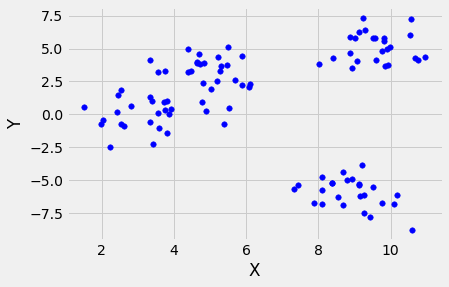

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

style.use("fivethirtyeight")

# make_blobs() is used to generate sample points
# around c centers (randomly chosen)
X, y = make_blobs(n_samples = 100, centers = 4,
				cluster_std = 1, n_features = 2)
				
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')

# label the axes
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.clf() # clear the figure


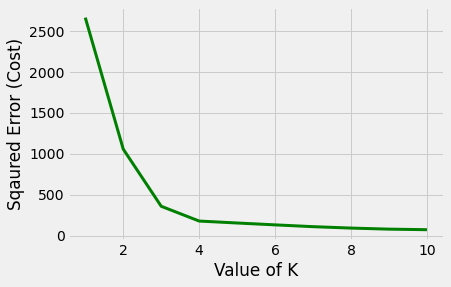

In [41]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot
  
# the point of the elbow is the 
# most optimal value for choosing k

## Clusters with K=4

In [42]:
# set number of clusters
kclusters_new = 4

toronto_italian_clustering_4 = toronto_italian.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters_new, random_state=0).fit(toronto_italian_clustering_4)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 3, 2, 0, 1, 0, 0], dtype=int32)

In [43]:
# Create a new dataframe that includes the cluster label
toronto_italian_merged_4 = toronto_italian.copy()

# add clustering labels
toronto_italian_merged_4["Cluster Labels"] = kmeans.labels_

In [44]:
# Merge with the neighborhood datframe to get latitude/longitude for each neighborhood
toronto_italian_merged_4 = toronto_italian_merged_4.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(toronto_italian_merged_4.shape)
toronto_italian_merged_4.head() # check the last columns!

(2142, 9)


Neighborhood  Italian Restaurant  Cluster Labels  \
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
1  Alderwood, Long Branch                 0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                     El Pulgarcito       43.792648       -79.259208   
0                          Twilight       43.791999       -79.258584   
0                            Mark's       43.791179       -79.259714   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   

              Venue Category  
0             Breakfast Spot  
0  Latin American Restaurant  
0                     Lounge  
0             Clothing Store  
1                Pizza Place

# 7. Create map with the clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_new)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_italian_merged['Venue Latitude'], toronto_italian_merged['Venue Longitude'], toronto_italian_merged['Neighborhood'], toronto_italian_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
# save the map as HTML file
map_clusters.save('Toronto_neighborhood_map_clusters.html')

# 8. Examine the clusters

## cluster 0

In [73]:
toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 0]

Neighborhood  Italian Restaurant  \
0                                           Agincourt                0.00   
0                                           Agincourt                0.00   
0                                           Agincourt                0.00   
0                                           Agincourt                0.00   
1                              Alderwood, Long Branch                0.00   
1                              Alderwood, Long Branch                0.00   
1                              Alderwood, Long Branch                0.00   
1                              Alderwood, Long Branch                0.00   
1                              Alderwood, Long Branch                0.00   
1                              Alderwood, Long Branch                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
2     Bathurst Manor, Wilson Heights, Downsview North                0.00   
3                                     Bayview Village                0.00   
3                                     Bayview Village                0.00   
3                                     Bayview Village                0.00   
3                                     Bayview Village                0.00   
6                         Birch Cliff, Cliffside West                0.00   
6                         Birch Cliff, Cliffside West                0.00   
6                         Birch Cliff, Cliffside West                0.00   
6                         Birch Cliff, Cliffside West                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railway Lands, Har...                0.00   
8   CN Tower, King and Spadina, Railw

## cluster 1

In [74]:
toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 1]

Neighborhood  Italian Restaurant  \
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
7   Brockton, Parkdale Village, Exhibition Place            0.045455   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11                            Central Bay Street            0.044118   
11  

## cluster 2

In [75]:
toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 2]

Neighborhood  Italian Restaurant  Cluster Labels  \
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   
4  Bedford Park, Lawrence Manor East            0.107143               3   

   Neighborhood Latitude  Neighborhood Longitude  \
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   
4              43.733283               -79.41975   

                                              Venue  Venue Latitude  \
4                                Aroma Espresso Bar       43.735975   
4                                 Pheasant & Firkin       43.735173   
4                                     Drums N Flats       43.735035   
4                         

# cluster 3

In [76]:
toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 3]

Neighborhood  Italian Restaurant  \
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                         Berczy Park            0.017241   
5                                    

### Total venues in clusters

In [77]:

cluster_0 = toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 0]
len_cluster_0 = len(cluster_0)

cluster_1 = toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 1]
len_cluster_1 = len(cluster_1)

cluster_2 = toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 2]
len_cluster_2 = len(cluster_2)

cluster_3 = toronto_italian_merged_4.loc[toronto_italian_merged['Cluster Labels'] == 3]
len_cluster_3 = len(cluster_3)


print('Total neighborhoods in cluster 0 =', len_cluster_0)
print('Total neighborhoods in cluster 1 =', len_cluster_1)
print('Total neighborhoods in cluster 2 =', len_cluster_2)
print('Total neighborhoods in cluster 3 =', len_cluster_3)


Total neighborhoods in cluster 0 = 945
Total neighborhoods in cluster 1 = 396
Total neighborhoods in cluster 2 = 28
Total neighborhoods in cluster 3 = 689


# Conclusions

### From the clustering analysis we see that the concentration of Italian restaurants in each cluster is as follows:

* Total venues in cluster 0 = 945
* Total venues in cluster 1 = 396
* Total venues in cluster 2 = 28
* Total venues in cluster 3 = 689





The first cluster (cluster 0) has the highest concentration of venues with 43,9 % of the total amount of restaurants. The second cluster has a medium concentration of 18,4%, while the third one has the lowest concentration of venues with only 1,3%. The fourth one has a high concentration of 32%.

## Let's look closer the third cluster

In [79]:
neighborhoods_1 = toronto_italian_merged.loc[toronto_italian_merged['Cluster Labels'] == 2]
neighborhoods_1['Neighborhood'].unique()

array(['Bedford Park, Lawrence Manor East'], dtype=object)

## Demographics of Toronto

### Import data for Toronto Neighborhoods

In [53]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
body = client_645eab8fb8b045ed88b431a33b7ac843.get_object(Bucket='capstoneprojectnotebook-donotdelete-pr-i1vaabqnrrhjbu',Key='wellbeing_toronto indicators.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
    

Neighbourhood  Neighbourhood Id  Combined Indicators  \
0             West Humber-Clairville                 1                  NaN   
1  Mount Olive-Silverstone-Jamestown                 2                  NaN   
2       Thistletown-Beaumond Heights                 3                  NaN   
3                    Rexdale-Kipling                 4                  NaN   
4                   Elms-Old Rexdale                 5                  NaN   

   Total Population  Average Family Income  Pop - Males  Pop - Females  \
0             33312                  72820        16625          16690   
1             32954                  57411        16070          16890   
2             10360                  70838         5055           5300   
3             10529                  69367         5130           5395   
4              9456                  61196         4520           4935   

   Pop 15 - 64 years  
0              23285  
1              22300  
2               6760  
3               7165  
4               6370

In [54]:
neighborhoods_1.tail()

Neighborhood  Italian Restaurant  Cluster Labels  \
98           York Mills West                 0.0               0   
98           York Mills West                 0.0               0   
98           York Mills West                 0.0               0   
98           York Mills West                 0.0               0   
99  York Mills, Silver Hills                 0.0               0   

    Neighborhood Latitude  Neighborhood Longitude  \
98              43.752758              -79.400049   
98              43.752758              -79.400049   
98              43.752758              -79.400049   
98              43.752758              -79.400049   
99              43.757490              -79.374714   

                                       Venue  Venue Latitude  Venue Longitude  \
98                           Tournament Park       43.751257       -79.399717   
98                         Kitchen Food Fair       43.751298       -79.401393   
98          iRemodel Commercial Construction       43.750808       -79.402356   
98  416-Flowers, Order & Send Flowers Online       43.748405       -79.399588   
99                           Vyner Greenbelt       43.759642       -79.369590   

                Venue Category  
98                        Park  
98           Convenience Store  
98  Construction & Landscaping  
98                 Flower Shop  
99                        Park

## Create table for the cluster

In [57]:
neighborhood_table = [['Lawrence Manor',43, 17510, 65104], ['Bedford Park', 39, 23236, 161110]]


df_n1 = pd.DataFrame(neighborhood_table, columns = ['Neighborhood', 'Neighbourhood Id', 'Population', 'Average Family Income'])

df_n1




Neighborhood  Neighbourhood Id  Population  Average Family Income
0  Lawrence Manor                43       17510                  65104
1    Bedford Park                39       23236                 161110

### Calculate the average population and income for each cluster

#### Neighborhood 1

In [56]:
avg_n1 = df_n1.mean(axis=0)

avg_n1


Neighbourhood Id             41.0
Population                20373.0
Average Family Income    113107.0
dtype: float64

In [89]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df_data_1.rename(columns = {'Pop - Males':'Males','Pop - Females' : 'Females' , 'Pop 15 - 64 years' : 'Age 15 - 64'}, inplace = True)

In [91]:
df_data_1
   

Neighbourhood  Neighbourhood Id  Combined Indicators  \
0               West Humber-Clairville                 1                  NaN   
1    Mount Olive-Silverstone-Jamestown                 2                  NaN   
2         Thistletown-Beaumond Heights                 3                  NaN   
3                      Rexdale-Kipling                 4                  NaN   
4                     Elms-Old Rexdale                 5                  NaN   
5        Kingsview Village-The Westway                 6                  NaN   
6     Willowridge-Martingrove-Richview                 7                  NaN   
7             Humber Heights-Westmount                 8                  NaN   
8             Edenbridge-Humber Valley                 9                  NaN   
9                   Princess-Rosethorn                10                  NaN   
10      Eringate-Centennial-West Deane                11                  NaN   
11                       Markland Wood                12                  NaN   
12                 Etobicoke West Mall                13                  NaN   
13          Islington-City Centre West                14                  NaN   
14                      Kingsway South                15                  NaN   
15                 Stonegate-Queensway                16                  NaN   
16                              Mimico                17                  NaN   
17                         New Toronto                18                  NaN   
18                         Long Branch                19                  NaN   
19                           Alderwood                20                  NaN   
20                       Humber Summit                21                  NaN   
21                          Humbermede                22                  NaN   
22                Pelmo Park-Humberlea                23                  NaN   
23                         Black Creek                24                  NaN   
24              Glenfield-Jane Heights                25                  NaN   
25                Downsview-Roding-CFB                26                  NaN   
26             York University Heights                27                  NaN   
27                              Rustic                28                  NaN   
28                          Maple Leaf                29                  NaN   
29                 Brookhaven-Amesbury                30                  NaN   
30                  Yorkdale-Glen Park                31                  NaN   
31                 Englemount-Lawrence                32                  NaN   
32                        Clanton Park                33                  NaN   
33                      Bathurst Manor                34                  NaN   
34                 Westminster-Branson                35                  NaN   
35                    Newtonbrook West                36                  NaN   
36                     Willowdale West                37                  NaN   
37                    Lansing-Westgate                38                  NaN   
38                Bedford Park-Nortown                39                  NaN   
39                St.Andrew-Windfields                40                  NaN   
40   Bridle Path-Sunnybrook-York Mills                41                  NaN   
41                   Banbury-Don Mills                42                  NaN   
42                    Victoria Village                43                  NaN   
43                     Flemingdon Park                44                  NaN   
44                   Parkwoods-Donalda                45                  NaN   
45                       Pleasant View                46                  NaN   
46                  Don Valley Village                47                  NaN   
47                   Hillcrest Village                48                  NaN   
48               Bayview Woods-Steeles                49

In [84]:
df_data_1.loc[df_data_1['Neighbourhood'] == 'Mount Pleasant East']

Neighbourhood  Neighbourhood Id  Combined Indicators  \
98  Mount Pleasant East                99                  NaN   

    Total Population  Average Family Income  Males  Females  Age 15 - 64  
98             16775                 133977   7790     8990        11345

In [58]:
new_data = df_data_1.drop(['Neighbourhood', 'Total Population', 'Combined Indicators', 'Average Family Income'], axis = 1)
new_data

Neighbourhood Id  Pop - Males  Pop - Females  Pop 15 - 64 years
0                   1        16625          16690              23285
1                   2        16070          16890              22300
2                   3         5055           5300               6760
3                   4         5130           5395               7165
4                   5         4520           4935               6370
5                   6        10575          11420              14175
6                   7        10635          11515              13690
7                   8         4895           6060               6445
8                   9         7305           8235              10125
9                  10         5430           5620               7250
10                 11         8915           9670              12190
11                 12         4920           5635               6505
12                 13         5630           6220               8090
13                 14        20950          23020              30730
14                 15         4340           4930               5690
15                 16        12255          12795              16810
16                 17        16525          17430              25300
17                 18         5560           5750               8170
18                 19         5010           5070               7340
19                 20         5885           6165               8275
20                 21         6035           6385               7890
21                 22         7475           8070              10440
22                 23         5165           5560               7395
23                 24        10145          11595              14265
24                 25        14250          16245              19690
25                 26        16835          18225              23780
26                 27        13650          13940              20015
27                 28         4450           5485               6140
28                 29         4850           5260               6585
29                 30         8225           9535              12270
30                 31         6865           7945               9535
31                 32         9860          12515              13850
32                 33         7815           8660              11325
33                 34         7510           8370              10605
34                 35        12060          14215              17710
35                 36        11230          12595              16860
36                 37         7990           8945              11775
37                 38         7680           8490              11595
38                 39        10845          12390              14700
39                 40         8525           9290              11935
40                 41         4460           4810               6045
41                 42        12825          14875              17105
42                 43         8110           9405              11475
43                 44        10535          11385              14570
44                 45        16455          18350              23705
45                 46         7600           8225              10575
46                 47        12880          14160              18275
47                 48         7925           9005              10510
48                 49         6025           7125               7960
49                 50         7600           8500              11200
50                 51        23680          26740              38235
51                 52        10030          11360              15360
52                 53         7685           8045              11765
53                 54         9015           9660              12860
54                 55        10305          10810              13150
55                 56         8020           8810              10990
56                 57         5460           6040               8165
57 

## Add more data to cluster 1

In [59]:
df_n1_new = df_n1.merge(new_data, on="Neighbourhood Id", how="left")

In [60]:
df_n1_new 

Neighborhood  Neighbourhood Id  Population  Average Family Income  \
0  Lawrence Manor                43       17510                  65104   
1    Bedford Park                39       23236                 161110   

   Pop - Males  Pop - Females  Pop 15 - 64 years  
0         8110           9405              11475  
1        10845          12390              14700

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt



## Compare income per cluster

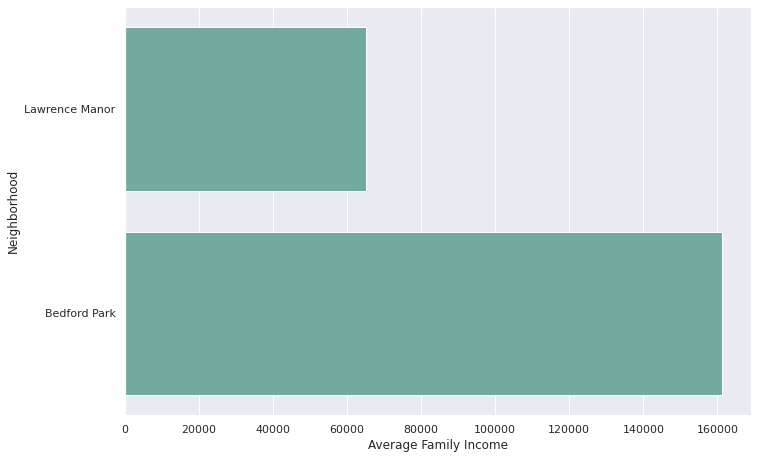

In [62]:
sns.set(style="darkgrid")

# load dataset

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Average Family Income", 
    y="Neighborhood", 
    data=df_n1_new, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

## Find the ratio of people Age 15-64 to the total population

In [68]:
df_n1_new['Ratio 15-64'] = df_n1_new['Pop 15 - 64 years']/df_n1_new['Population']

In [69]:
df_n1_new

Neighborhood  Neighbourhood Id  Population  Average Family Income  \
0  Lawrence Manor                43       17510                  65104   
1    Bedford Park                39       23236                 161110   

   Pop - Males  Pop - Females  Pop 15 - 64 years  Ratio 15-64  
0         8110           9405              11475     0.655340  
1        10845          12390              14700     0.632639

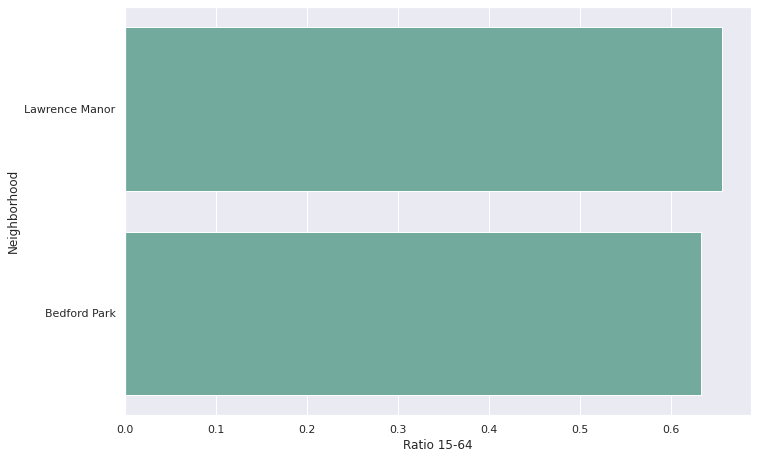

In [70]:
sns.set(style="darkgrid")

# load dataset

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Ratio 15-64", 
    y="Neighborhood", 
    data=df_n1_new, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

## Population comparison

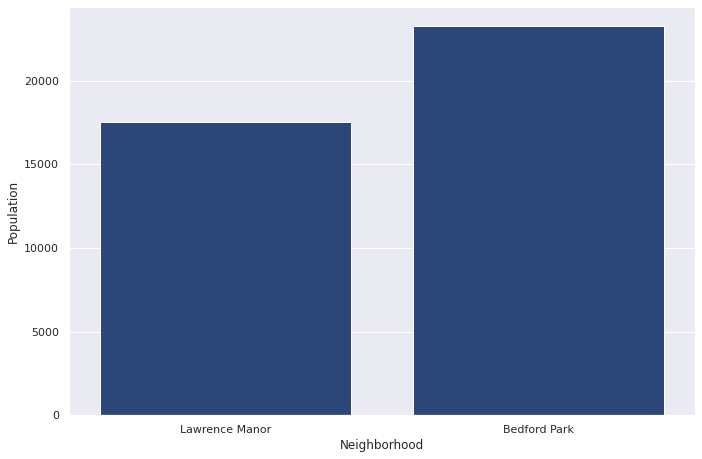

In [71]:
sns.set(style="darkgrid")

# load dataset

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Neighborhood", 
    y="Population", 
    data=df_n1_new, 
    estimator=sum, 
    ci=None, 
    color='#1e4486');